# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Your code here
df = pd.read_csv(r'../data/boston_data.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [5]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


In [6]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas       float64
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [4]:
# Your plots here
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

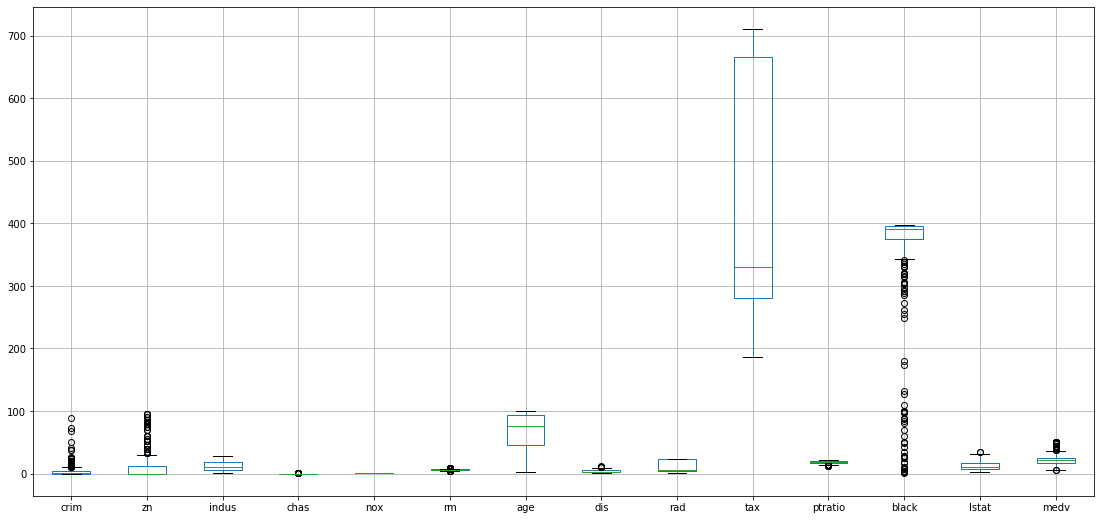

In [14]:
import seaborn as sns
#ax = sns.boxplot(data=iris, orient="h"

df.boxplot(figsize=(19,9))

## IQR SCORE

The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.

In [31]:
Q1 = df.quantile(0.02)
Q3 = df.quantile(0.98)
IQR = Q3 - Q1
IQR

crim        24.989127
zn          82.350000
indus       24.130000
chas         1.000000
nox          0.467940
rm           3.076040
age         91.570000
dis          7.547014
rad         23.000000
tax        473.000000
ptratio      8.194000
black      386.061800
lstat       26.783200
medv        41.888000
dtype: float64

In [32]:
print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

      crim     zn  indus   chas    nox     rm    age    dis    rad    tax  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
399  False  False  False  False  False  False  False  False  False  False   
400  False  False  False  False  False  False  False  False  False  False   
401  False  False  False  False  False  False  False  False  False  False   
402  False  False  False  False  False  False  False  False  False  False   
403  False  False  False  False  False  False  False  False  False  False   

     ptratio  black  lstat   medv  
0      False  False  False  False  
1  

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [36]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

(401, 14)

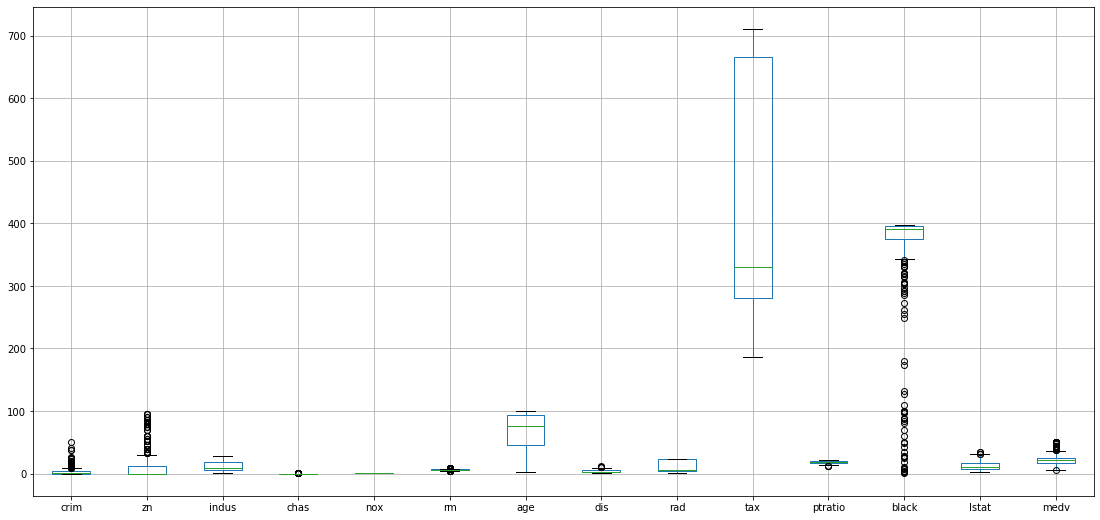

In [35]:
df_out.boxplot(figsize=(19,9))

In [22]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

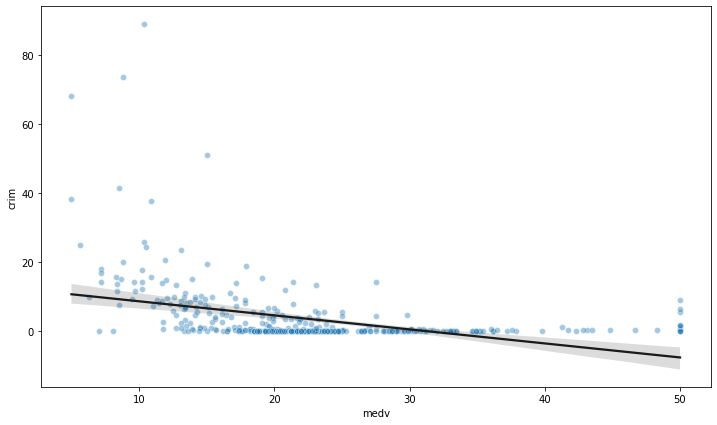

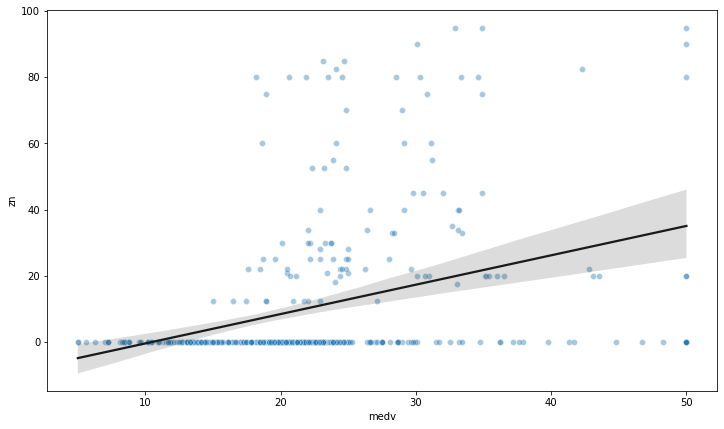

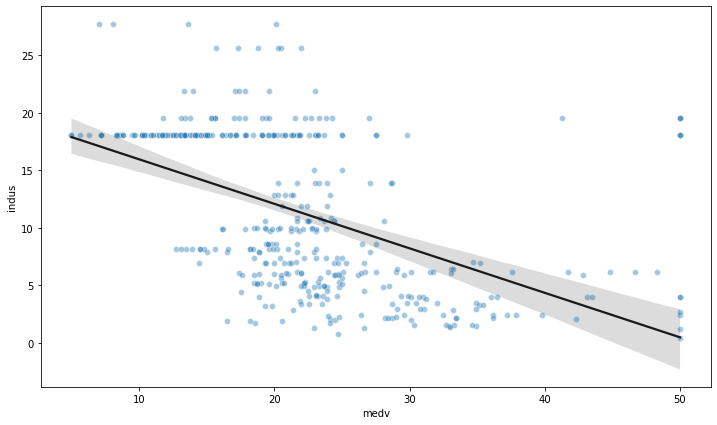

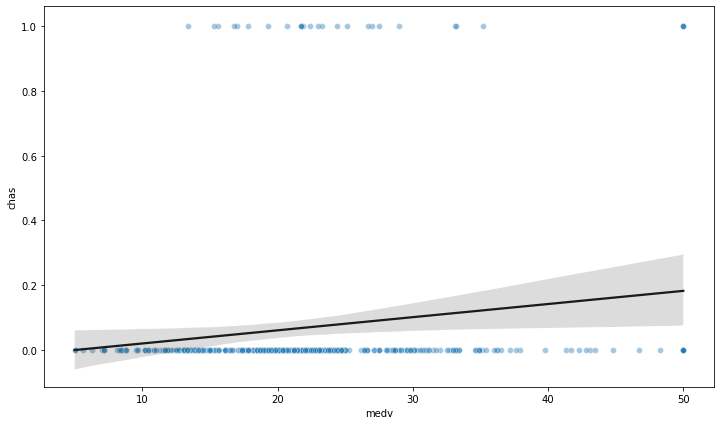

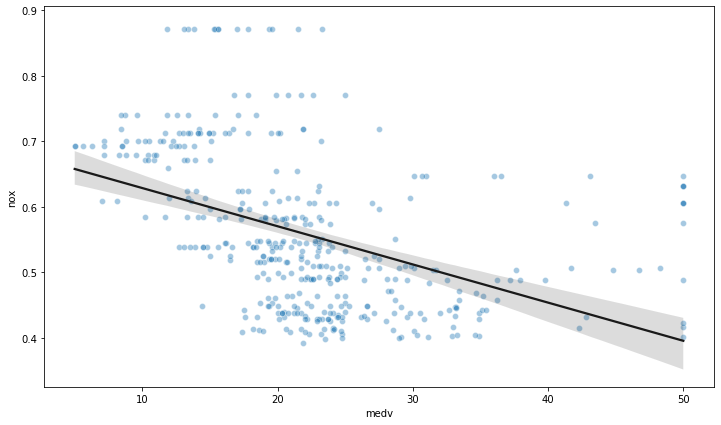

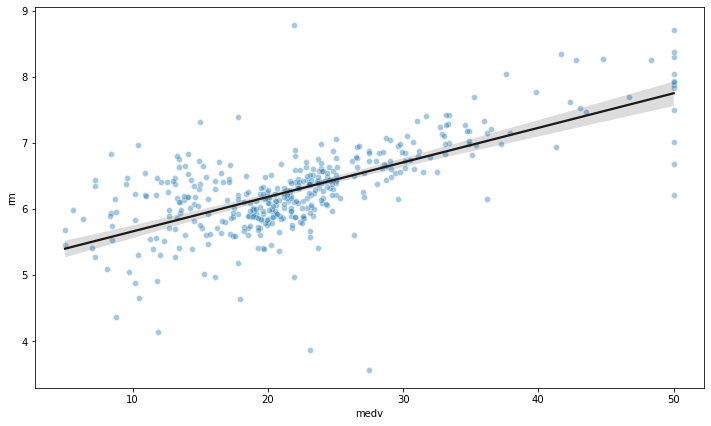

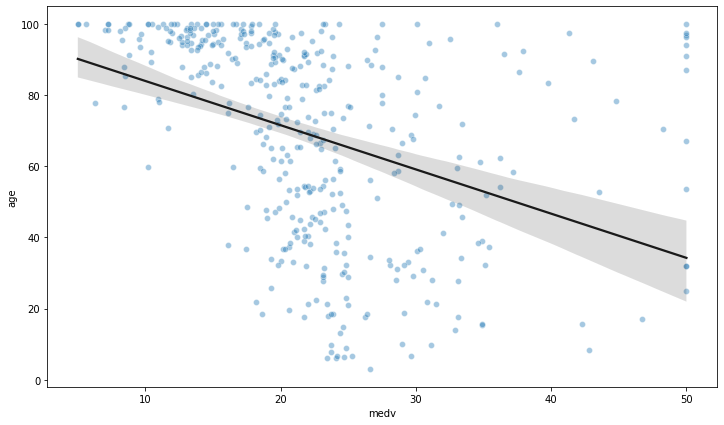

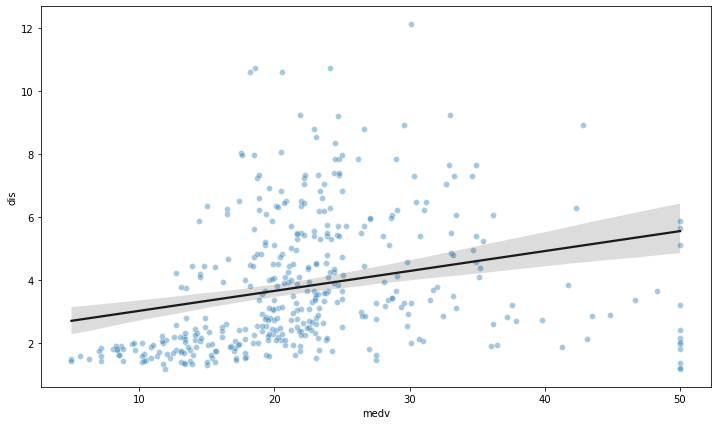

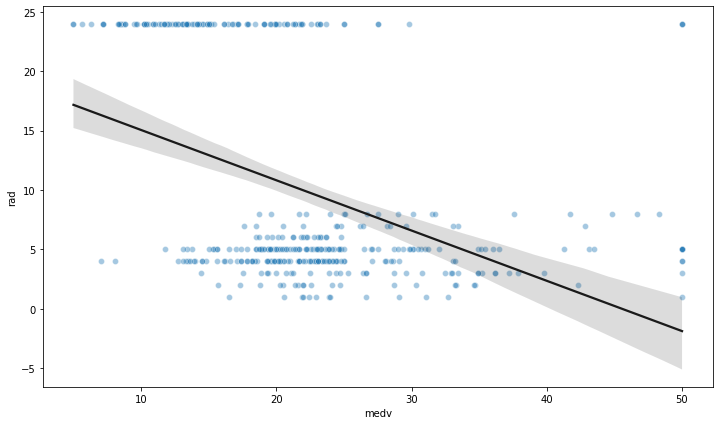

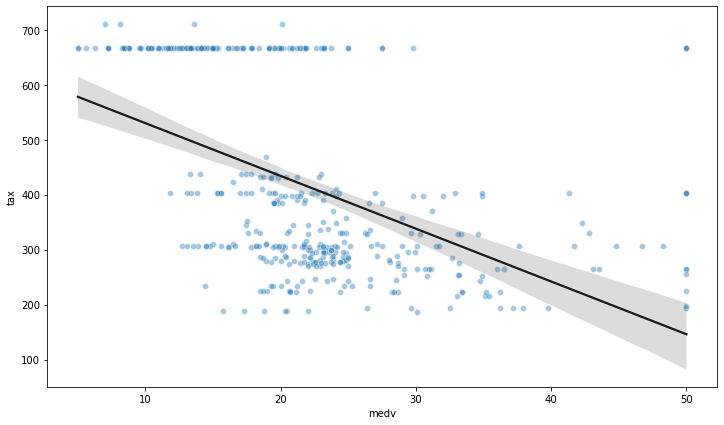

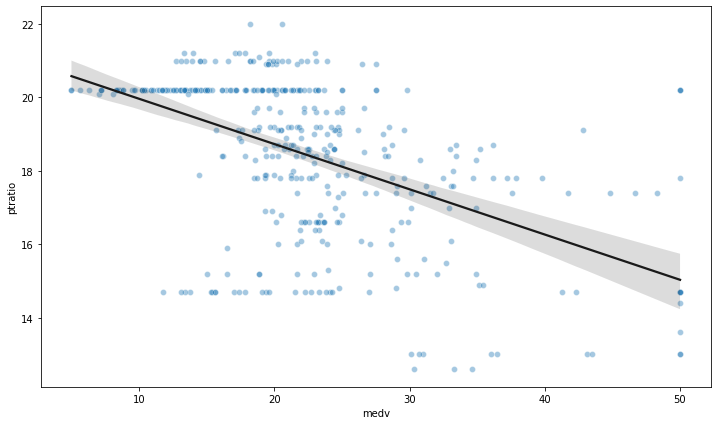

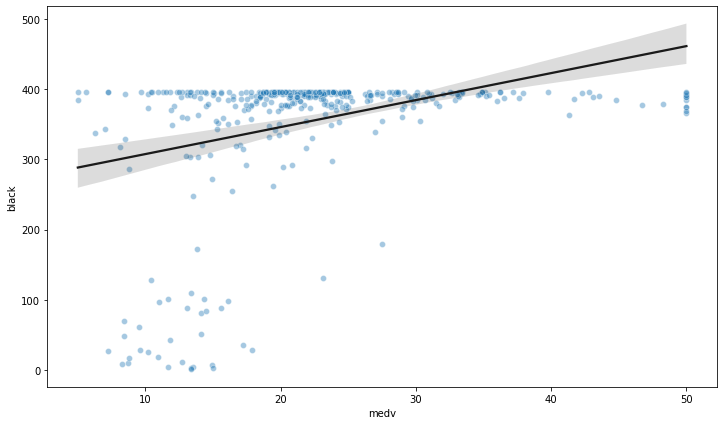

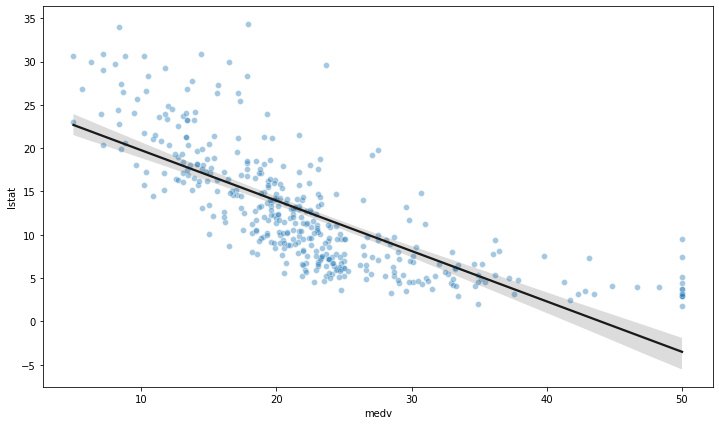

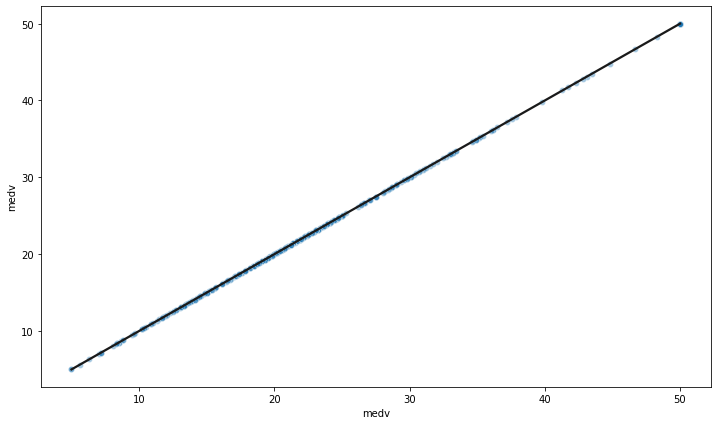

In [52]:
var = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv']
for i in var:
    plt.figure(figsize=(12,7))
    #plt.scatter(df.medv, df[i], s=75, c=df["medv"], cmap="BuGn")
    sns.scatterplot(x='medv', y=i, alpha=0.4, data=df)
    sns.regplot('medv', i, data=df, scatter=False, color=".1")
    plt.show()

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

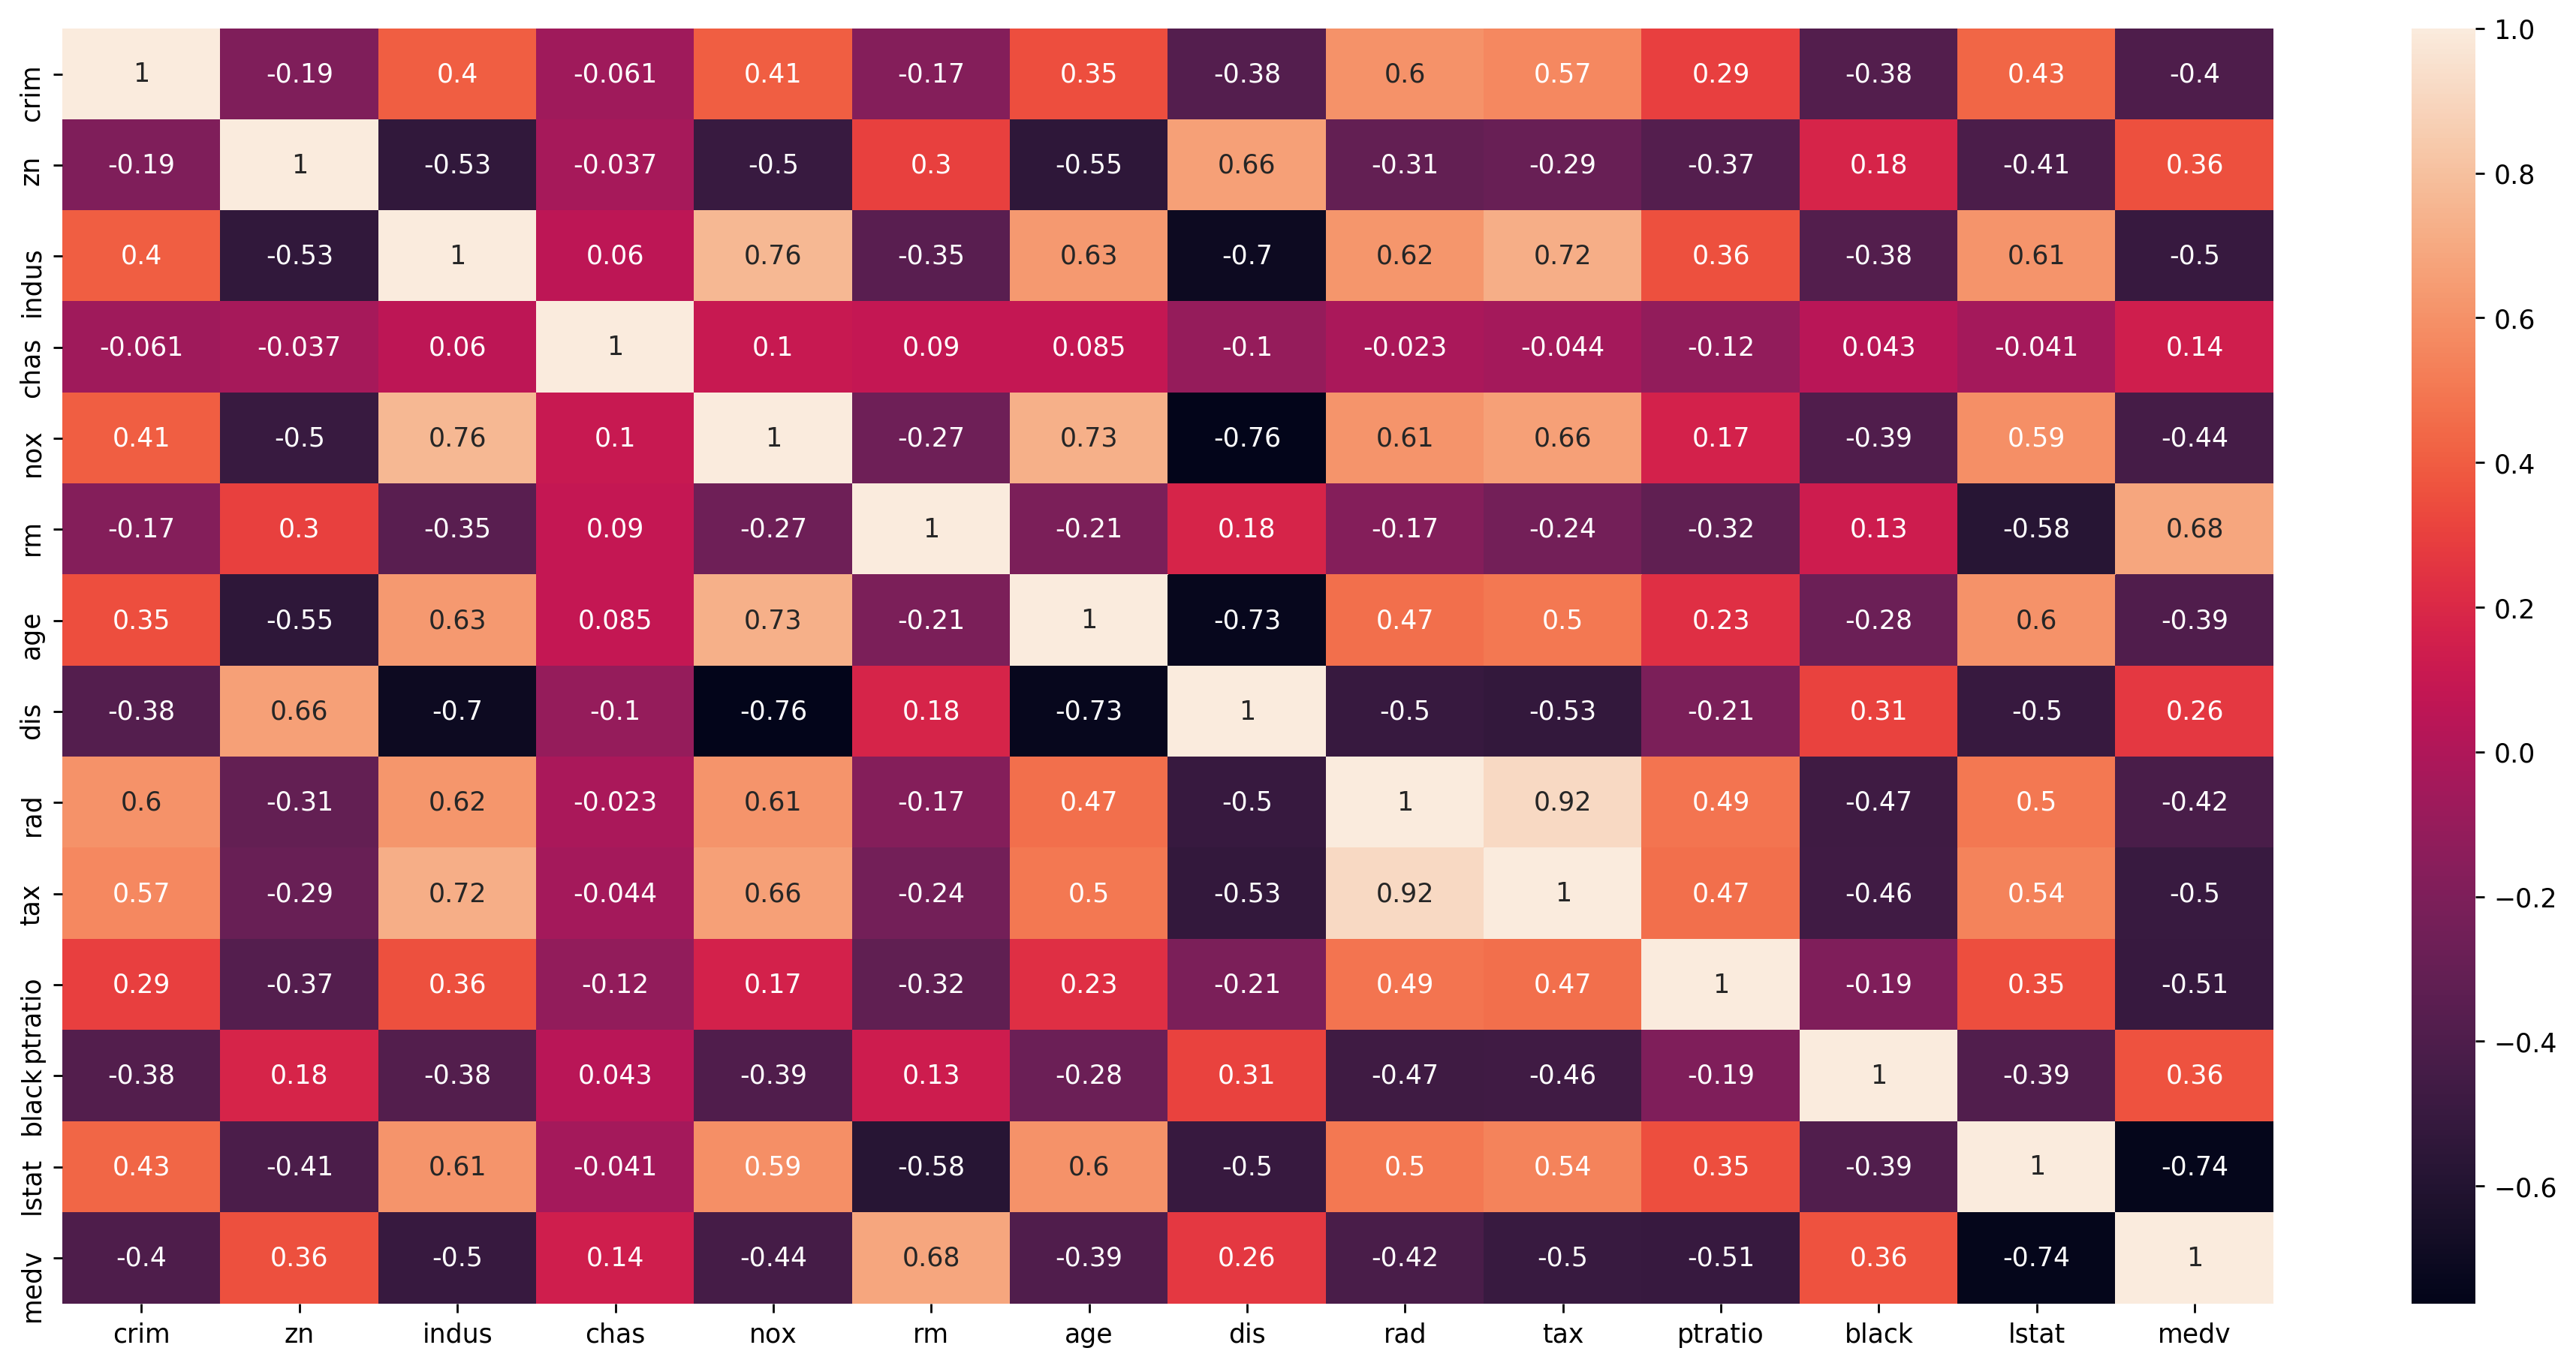

In [21]:
# Your response here
plt.figure(figsize=(19,9), dpi=250)
sns.heatmap(df.corr(), annot=True)

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

In [54]:
# Your response here
df.drop('rad', axis=1, inplace=True)

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [55]:
# Your code here
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,711.000000,22.000000,396.900000,34.370000,50.000000


----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [64]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    result = r2_score(y_true, y_predict)
    return result

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [59]:
# Your code here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df.drop('medv', axis=1)
y = df['medv']

clf = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [60]:
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
y_pred = clf.predict(X_test)

In [65]:
performance_metric(y_test, y_pred)

0.8458407462275765

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [69]:
# Five separate RFR here with the given max depths
from sklearn.ensemble import RandomForestRegressor
max_depth = [2, 4, 6, 8, 10]
score_train = []
score_test  = []
for i in max_depth:
    regr = RandomForestRegressor(max_depth=i)
    result = regr.fit(X_train, y_train)
    y_pred_train = result.predict(X_train)
    y_pred_test = result.predict(X_test)
    r2_score_training = r2_score(y_train, y_pred_train)
    r2_score_test = r2_score(y_test, y_pred_test)
    print(f'rand_forest {i} training score = {r2_score_training} Vs. test score = {r2_score_test}')
    score_train.append(r2_score_training)
    score_test.append(r2_score_test)

rand_forest 2 training score = 0.7722033204754369 Vs. test score = 0.7870556300836545
rand_forest 4 training score = 0.9092199153734556 Vs. test score = 0.8727193564142646
rand_forest 6 training score = 0.9536319190169937 Vs. test score = 0.9011900935533242
rand_forest 8 training score = 0.9663654001802303 Vs. test score = 0.9056659069387648
rand_forest 10 training score = 0.9715344528106801 Vs. test score = 0.9127598268020888


Now, plot the score for each tree on the training set and on the testing set.

Text(0, 0.5, 'r2 score')

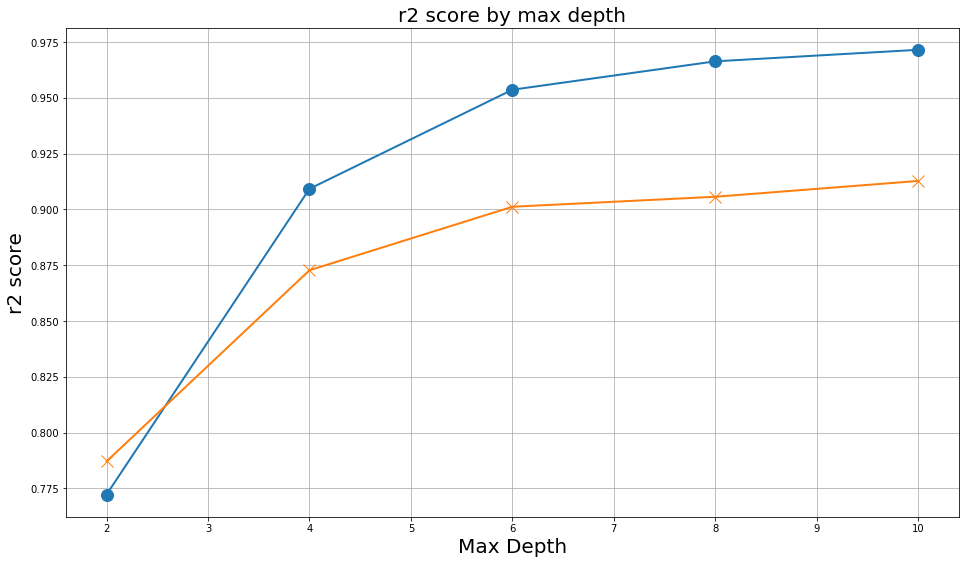

In [81]:
# Produce a plot with the score for the testing and training for the different max depths
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plt.grid()
plt.title('r2 score by max depth', size=20)
plt.plot(max_depth, score_train, label='score train', marker='o', linewidth=2, markersize=12)
plt.plot(max_depth, score_test, label='score test',marker='x', linewidth=2, markersize=12)
plt.xlabel('Max Depth', size=20)
plt.ylabel('r2 score', size=20)

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# Your response here

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [ ]:
# Your response here

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [ ]:
# Your response here

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here